In [ ]:
column_to_predict = 'transcriptConsumer'

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
drive_path = '/content/drive/My Drive/nlp-projects/inputs/vectorized2.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

df = pd.read_csv(drive_path)
df.shape

(362, 33)

In [ ]:
df.columns

Index(['firstConversation', 'transcriptAll', 'transcriptConsumer',
       'classification', 'classification 2', 'transcriptAll_count',
       'transcriptConsumer_count', 'category', 'labels', 'transcriptAll_en',
       'transcriptConsumer_en', 'despair_0', 'despair_1', 'loneliness_0',
       'loneliness_1', 'emotional overflow_0', 'emotional overflow_1',
       'self blame_0', 'self blame_1', 'anxiety_0', 'anxiety_1',
       'distrust / confusion_0', 'distrust / confusion_1',
       'new assault / new exposure_0', 'new assault / new exposure_1',
       'level of suicide/ level of risk_0',
       'level of suicide/ level of risk_1',
       'level of suicide/ level of risk_2',
       'level of suicide/ level of risk_3',
       'obligation to report occording law_0',
       'obligation to report occording law_1', 'support for support circuls_0',
       'support for support circuls_1'],
      dtype='object')

In [ ]:
#df['feelings_vector']

In [ ]:
"""
import ast

if isinstance(df['feelings_vector'].iloc[0], str):
    df['feelings_vector'] = df['feelings_vector'].apply(ast.literal_eval)

# Ensure feelings_vector contains lists of floats
df['feelings_vector'] = df['feelings_vector'].apply(lambda x: list(map(float, x)))
print(df['feelings_vector'])
"""

"\nimport ast\n\nif isinstance(df['feelings_vector'].iloc[0], str):\n    df['feelings_vector'] = df['feelings_vector'].apply(ast.literal_eval)\n\n# Ensure feelings_vector contains lists of floats\ndf['feelings_vector'] = df['feelings_vector'].apply(lambda x: list(map(float, x)))\nprint(df['feelings_vector'])\n"

In [ ]:
from sklearn.model_selection import train_test_split

"""
X = df['feelings_vector'].tolist()
y = df['classification']
"""
cols = ['despair_0', 'despair_1', 'loneliness_0',
       'loneliness_1', 'emotional overflow_0', 'emotional overflow_1',
       'self blame_0', 'self blame_1', 'anxiety_0', 'anxiety_1',
       'distrust / confusion_0', 'distrust / confusion_1',
       'new assault / new exposure_0', 'new assault / new exposure_1',
       'level of suicide/ level of risk_0',
       'level of suicide/ level of risk_1',
       'level of suicide/ level of risk_2',
       'level of suicide/ level of risk_3',
       'obligation to report occording law_0',
       'obligation to report occording law_1', 'support for support circuls_0',
       'support for support circuls_1']

num_labels = len(cols)
X = df[cols].values.tolist()
y = df['classification'].tolist()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_train

[[1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0],
 [0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0],
 [1.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0],
 [0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0],
 [1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0],
 [1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0],
 [1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,


# Model Selection - RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)


# Training the Model

In [ ]:
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# Making Predictions

In [ ]:
X_test

[[0.0,
  1.0,
  0.0,
  1.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0],
 [0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0],
 [0.0,
  1.0,
  0.0,
  1.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0],
 [1.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0],
 [0.0,
  1.0,
  0.0,
  1.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0],
 [1.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0],
 [1.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,


In [ ]:
y_pred = model.predict(X_test)

# Evaluating the Model

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Accuracy: 0.7397260273972602
Precision: 0.6766144814090019
Recall: 0.7397260273972602
F1 Score: 0.7034807407760965


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Save the Model

In [ ]:
model_path = '/content/drive/My Drive/nlp-projects/models/vector-to-classification/random_forest_model.joblib'
results_path = '/content/drive/My Drive/nlp-projects/results/vector-to-classification/full_predictions.csv'

In [ ]:
import joblib

# Save the model to a file
joblib.dump(model, model_path)

['/content/drive/My Drive/nlp-projects/models/vector-to-classification/random_forest_model.joblib']

In [ ]:
import pickle

model_path = '/content/drive/My Drive/nlp-projects/models/vector-to-classification/random_forest_model.pkl'
with open(model_path, 'wb') as file:
    pickle.dump(model, file)

In [ ]:
text = """
Hi, I fell into a twin that I can't get out of. I don't think it's possible. I don't think it's possible. I'm lost. I don't know what happened to me, what's happening to me. I don't remember and I don't want to remember anything. I don't know what's happening to me, I don't know what I'm doing, what I want, what I'm interested in is just drinking some kind of lol, this is the best and most reliable friend, isn't it good? There are no friends, only one and only friend, this is drinking, I don't want to hear that word, friendship with friendship, what? I don't know why I'm still in this life anyway I feel like wind and air so why?? It's just a waste, I don't know, I don't know, I'm not interested either, really, I'm in a kind of bubble of my own, yes, I called, I was in a meeting, I don't remember what they said, and they didn't get back to me, so I'm probably not interested, I don't know, I'm broken by everything, I don't care about anything anymore, sorry for the sentence about my dick I can't take this whole life anymore. I'm already 35. What can I tell you, how beautiful my moments are, how happy I am, how happy I am that I came into this world, how life just smiles at me, how good I am and how happy I am. Unfortunately, I have a family, but I'm not in contact with them. I don't have Hobbies and I don't like to do anything. I listen to everything from everything. Even if I drink and don't have it. I probably won't like it. The song is not for nothing. Now I received very good and happy news that they closed my 2 cases, do you understand how black I am? What I didn't understand was exactly what kind of light they closed my complaints, they don't treat me there either, it doesn't interest me today, it's just a celebration, drink more for closing the cases, everything is fine, I'm not I'm angry or hurt don't feel uncomfortable I'm already immune I can't be hurt by anything and nothing after this year with already I'm sorry yes I'm not explaining myself correctly and I'm sorry for that understand it's from the drinking I'm really not I'm not out of it I want me to tell you Something that I saw myself a little bit more, really a little bit, that I also get worse from drinking, why alone I can't do it anyway, I don't have a family to support me, no, there is no one to help me, they haven't helped me until now, why will they help me now, the difficulty in general is my whole life And they didn't help me and this year what I went through in my whole life is nothing
"""
vec = [[0,1,0,0,0,0,0,1,1,0,0]]
res = model.predict(vec)

res

ValueError: X has 11 features, but RandomForestClassifier is expecting 22 features as input.

# Predict the whole data

In [ ]:
df['predicted_classification'] = model.predict(X)

# Save predictions to a CSV file
df.to_csv(results_path, index=False)

# Model Selection - BertForSequenceClassification

In [ ]:
!pip install accelerate -U
!pip install torch transformers -U
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 5.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
import torch

In [ ]:


class SentimentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts
        print('labels', labels)
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        labels = self.labels[idx]
        encoding = self.tokenizer(
            text,
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(labels, dtype=torch.float)
        }

In [ ]:

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_labels)

SIZE= df.shape[0]

texts = df[column_to_predict].values
labels_vec = df[cols].values.tolist()

train_texts= list(texts[:SIZE//2])
val_texts=   list(texts[SIZE//2:(3*SIZE)//4 ])
test_texts=  list(texts[(3*SIZE)//4:])

train_labels= list(labels_vec[:SIZE//2])
val_labels=   list(labels_vec[SIZE//2:(3*SIZE)//4])
test_labels=  list(labels_vec[(3*SIZE)//4:])



# Create datasets
train_dataset = SentimentDataset(train_texts, train_labels, tokenizer, max_length=128)
val_dataset = SentimentDataset(val_texts, val_labels, tokenizer, max_length=128)
test_dataset = SentimentDataset(test_labels, val_labels, tokenizer, max_length=128)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


labels [[1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0], [0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0], [1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0], [1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0], [1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0], [1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0], [1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0], [1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0], [1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 

# check it

In [ ]:
# Extract the vectors and labels
vectors = df[cols].values
labels = df['classification'].values
num_classes = df['classification'].nunique()

<Axes: ylabel='count'>

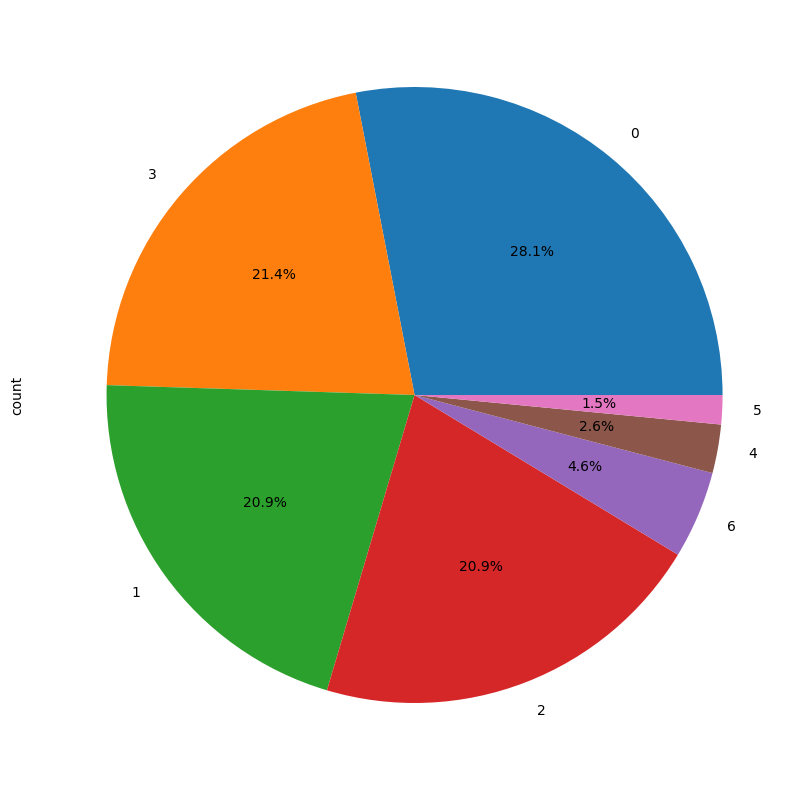

In [ ]:
df['classification'].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%')


In [ ]:
print(len(df))

362


In [ ]:
label_1_df = df[df['classification'] == 1]
len(label_1_df)

207

# Randomly Select 20% of These Rows to Drop

In [ ]:
rows_to_drop = label_1_df.sample(frac=0.8, random_state=1).index
len(rows_to_drop)

166

# Drop the Selected Rows from the Original DataFrame


In [ ]:
df = df.drop(rows_to_drop)
print(len(df))

196


In [ ]:
vectors

tensor([[1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
         1., 0., 1., 0.],
        [1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
         1., 0., 1., 0.],
        [1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0.,
         1., 0., 1., 0.],
        [1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
         1., 0., 1., 0.],
        [1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
         1., 0., 1., 0.],
        [1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
         1., 0., 1., 0.],
        [1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
         0., 1., 0., 1.],
        [1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
         1., 0., 1., 0.],
        [1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
         0., 1., 1., 0.],
        [1., 0., 1., 0., 1., 0., 0., 

In [ ]:
labels

array([1, 0, 0, 2, 4, 3, 0, 2, 6, 1, 2, 0, 1, 4, 2, 3, 2, 1, 0, 0, 2, 2,
       2, 0, 1, 4, 0, 0, 0, 2, 1, 0, 3, 2, 1, 1, 1, 0, 0, 0, 1, 0, 2, 4,
       0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0, 2, 5, 6, 2, 2, 1, 2,
       0, 2, 0, 6, 0, 2, 2, 3, 0, 0, 2, 1, 0, 0, 2, 2, 2, 0, 0, 2, 0, 3,
       2, 6, 3, 0, 2, 2, 6, 3, 2, 3, 1, 0, 3, 2, 6, 4, 0, 2, 0, 0, 0, 1,
       1, 2, 3, 1, 2, 1, 0, 1, 0, 0, 0, 3, 1, 3, 0, 6, 3, 1, 6, 2, 3, 3,
       0, 0, 3, 3, 0, 5, 0, 1, 0, 1, 3, 2, 0, 6, 3, 3, 2, 0, 5, 2, 2, 3,
       3, 2, 0, 0, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3])

In [ ]:
num_classes

7

# Create a Custom Dataset Class

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

class CustomVectorDataset(Dataset):
    def __init__(self, vectors, labels):
        self.vectors = torch.tensor(vectors, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.vectors[idx], self.labels[idx]

# Create dataset and dataloader
dataset = CustomVectorDataset(vectors, labels)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)


<ipython-input-112-9de5c1c4f238>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.vectors = torch.tensor(vectors, dtype=torch.float32)
<ipython-input-112-9de5c1c4f238>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.labels = torch.tensor(labels, dtype=torch.long)


# Define the Model

In [ ]:
import torch.nn as nn

class SimpleNNClassifier(nn.Module):
    def __init__(self, input_size, num_classes):
        super(SimpleNNClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

input_size = vectors.shape[1]  # Number of input features
#num_classes = len(set(labels))  # Number of classes
model = SimpleNNClassifier(input_size, num_classes)

print(input_size)
print(num_classes)

22
7


In [ ]:
import torch.optim as optim

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
model.train()

for epoch in range(num_epochs):
    for vectors, labels in dataloader:
        # Forward pass
        outputs = model(vectors)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')




Epoch [1/10], Loss: 2.0361
Epoch [2/10], Loss: 1.9959
Epoch [3/10], Loss: 1.9572
Epoch [4/10], Loss: 1.9196
Epoch [5/10], Loss: 1.8830
Epoch [6/10], Loss: 1.8476
Epoch [7/10], Loss: 1.8131
Epoch [8/10], Loss: 1.7800
Epoch [9/10], Loss: 1.7477
Epoch [10/10], Loss: 1.7162


In [ ]:
model_path = '/content/drive/My Drive/nlp-projects/models/vector-to-classification/SimpleNNClassifier-model-customer-en.pth'

In [ ]:
# Save the model

torch.save(model.state_dict(), model_path)

In [ ]:
model.load_state_dict(torch.load(model_path))

<All keys matched successfully>

In [ ]:
import numpy as np

# Define the model architecture (same as used during training)
class SimpleNNClassifier(nn.Module):
    def __init__(self, input_size, num_classes):
        super(SimpleNNClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Initialize the model
model = SimpleNNClassifier(input_size, num_classes)

# Load the model weights
model.load_state_dict(torch.load(model_path))



RuntimeError: Error(s) in loading state_dict for SimpleNNClassifier:
	size mismatch for fc2.weight: copying a param with shape torch.Size([7, 128]) from checkpoint, the shape in current model is torch.Size([10, 128]).
	size mismatch for fc2.bias: copying a param with shape torch.Size([7]) from checkpoint, the shape in current model is torch.Size([10]).

In [ ]:
model.eval()
list_of_vectors = [
    [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
    [0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1],
    [1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0]
]
predictions = []
for vector in list_of_vectors:
    # Convert the vector to tensor
    input_tensor = torch.tensor(vector, dtype=torch.float32).unsqueeze(0)  # Add batch dimension

    # Predict classification
    with torch.no_grad():
        output = model(input_tensor)
        prediction = torch.argmax(output, dim=1).item()
        predictions.append(prediction)

# Print the predictions
for i, prediction in enumerate(predictions):
    print(f'Prediction for vector {i + 1}: {prediction}')

Prediction for vector 1: 1
Prediction for vector 2: 1
Prediction for vector 3: 1
Prediction for vector 4: 4
Prediction for vector 5: 1


In [ ]:
from datasets import load_metric

# Load metrics
accuracy_metric = load_metric("accuracy")
precision_metric = load_metric("precision")
recall_metric = load_metric("recall")
f1_metric = load_metric("f1")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = (torch.sigmoid(torch.tensor(logits)) > 0.5).int().numpy()
    labels = labels.astype(int)

    accuracy = accuracy_metric.compute(predictions=predictions, references=labels)
    precision = precision_metric.compute(predictions=predictions, references=labels, average='macro')
    recall = recall_metric.compute(predictions=predictions, references=labels, average='macro')
    f1 = f1_metric.compute(predictions=predictions, references=labels, average='macro')

    return {
        'accuracy': accuracy['accuracy'],
        'precision': precision['precision'],
        'recall': recall['recall'],
        'f1': f1['f1']
    }

<ipython-input-10-fb788cbeedb8>:4: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  accuracy_metric = load_metric("accuracy")
/usr/local/lib/python3.10/dist-packages/datasets/load.py:759: FutureWarning: The repository for accuracy contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.1/metrics/accuracy/accuracy.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/datasets/load.py:759: FutureWarning: The repository for precision contains custom code which must be executed to correctly load the metric. You can insp

In [ ]:
from transformers import Trainer, TrainingArguments, EarlyStoppingCallback

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=10,  # Set to a higher number if you want early stopping to work well
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="epoch",
    save_strategy="epoch",  # Save model at the end of each epoch
    load_best_model_at_end=True,  # Load the best model at the end
    metric_for_best_model="eval_loss",  # Metric to use for early stopping
    greater_is_better=False  # Lower loss is better
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]  # Stop training if no improvement for 3 epochs
)

trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,0.497300,0.483735
2,0.492800,0.462856
3,0.457400,0.437847
4,0.450000,0.413281
5,0.418500,0.389754
6,0.379300,0.371648
7,0.385200,0.358852
8,0.357900,0.346040
9,0.330500,0.341021


Epoch,Training Loss,Validation Loss
1,0.497300,0.483735
2,0.492800,0.462856
3,0.457400,0.437847
4,0.450000,0.413281
5,0.418500,0.389754
6,0.379300,0.371648
7,0.385200,0.358852
8,0.357900,0.346040
9,0.330500,0.341021
10,0.345700,0.335483


TrainOutput(global_step=230, training_loss=0.41349385199339495, metrics={'train_runtime': 3301.7814, 'train_samples_per_second': 0.548, 'train_steps_per_second': 0.07, 'total_flos': 119079131980800.0, 'train_loss': 0.41349385199339495, 'epoch': 10.0})

In [ ]:
model_path = '/content/drive/My Drive/nlp-projects/models/vector-to-classification/bert-base-uncased-model-customer-en'

In [ ]:
trainer.save_model(model_path)
tokenizer.save_pretrained(model_path)

('/content/drive/My Drive/nlp-projects/models/vector-to-classification/bert-base-uncased-model-customer-en/tokenizer_config.json',
 '/content/drive/My Drive/nlp-projects/models/vector-to-classification/bert-base-uncased-model-customer-en/special_tokens_map.json',
 '/content/drive/My Drive/nlp-projects/models/vector-to-classification/bert-base-uncased-model-customer-en/vocab.txt',
 '/content/drive/My Drive/nlp-projects/models/vector-to-classification/bert-base-uncased-model-customer-en/added_tokens.json')

In [ ]:
from google.colab import drive
from transformers import BertTokenizer, BertForSequenceClassification
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

model_to_vector_path = '/content/drive/My Drive/nlp-projects/models/text-to-vector/customer-en-encoded'
model_to_text_vector = BertForSequenceClassification.from_pretrained(model_to_vector_path)
tokenizer_to_text_vector = BertTokenizer.from_pretrained(model_to_text_vector)
model_to_vector_path.eval()

OSError: Incorrect path_or_model_id: 'BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
          )
          (intermediate): BertIntermediate(
            (dense): Linear(in_features=768, out_features=3072, bias=True)
            (intermediate_act_fn): GELUActivation()
          )
          (output): BertOutput(
            (dense): Linear(in_features=3072, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
        )
      )
    )
    (pooler): BertPooler(
      (dense): Linear(in_features=768, out_features=768, bias=True)
      (activation): Tanh()
    )
  )
  (dropout): Dropout(p=0.1, inplace=False)
  (classifier): Linear(in_features=768, out_features=22, bias=True)
)'. Please provide either the path to a local folder or the repo_id of a model on the Hub.

In [ ]:
text = """
Hey I don't know what's happening to me what is happening to my body I always make mistakes and don't learn Me and my big mouth my mother's cup My biggest mistake in this life that I exist I have to keep my mouth shut and do and deal with things without telling True, but now I do it like a grown-up Aaaaaaaaa There is no one I don't want anyone either, I don't have faith in anyone It's best to be alone, lonely like a bitch, the best and the truest I'm sorry I'm taking it all out on you It's best to keep the right to remain silent and that's it Obviously Do not want you are right no matter everything is fine All is well
"""

In [ ]:
vector = store_sentiment_vector(text, binary_vector)
print(vector)

In [ ]:
model_vector_to_class_path = '/content/drive/My Drive/nlp-projects/models/text-to-vector/customer-en-encoded'
model_vector_to_class = BertForSequenceClassification.from_pretrained(model_vector_to_class_path)
tokenizer_vector_to_class = BertTokenizer.from_pretrained(model_vector_to_class)
model_vector_to_class.eval()

NameError: name 'BertTokenizerFast' is not defined

In [ ]:

  # Convert vectors to tensors
  input_tensors = torch.tensor(vector, dtype=torch.int64)

  # Predict classifications using the model
  with torch.no_grad():
      logits = model_vector_to_class(input_tensors).logits
      predictions = torch.argmax(logits, dim=1).numpy()

  # Add the predictions to the DataFrame
 predict = predictions
 print(predict)